# Álgebra lineal aplicada para ML

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# este funcion se utiliza para dibujar vectores
def graficarVectores(vecs, cols, alpha = 1):
    plt.axvline(x = 0, color="grey", zorder = 0)    
    plt.axhline(y = 0, color="grey", zorder = 0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                    [x[1]],
                    [x[2]],  
                    [x[3]],
                    angles = "xy", scale_units = "xy",
                    scale =1,
                    color = cols[i],
                    alpha = alpha
        )

## Transformaciones lineales

In [5]:
A = np.array([[-1,3],[2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [6]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

(-0.5, 2.0)

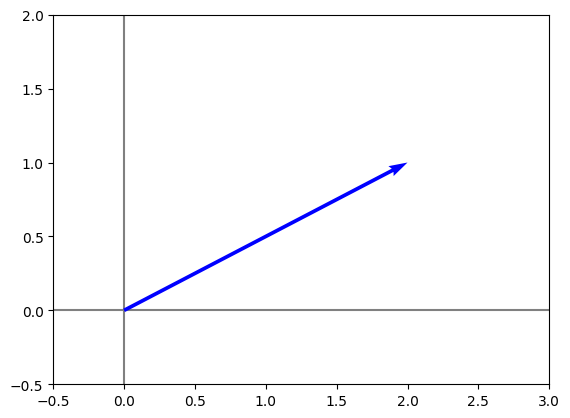

In [15]:
graficarVectores([vector.flatten()], cols ="blue")
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)


In [16]:
vector_transformado = A.dot(vector)
vector_transformado

array([[1],
       [2]])

(-0.5, 3.0)

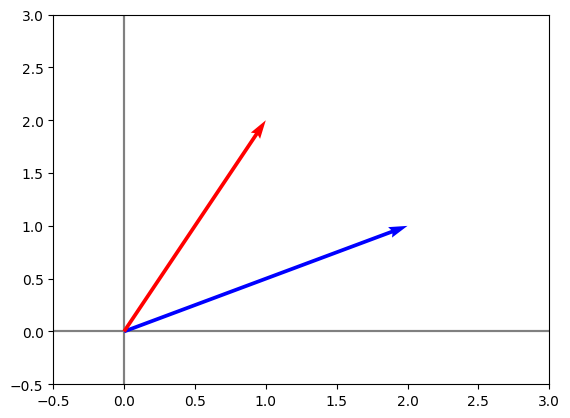

In [18]:
graficarVectores([vector.flatten()], cols ="blue")
graficarVectores([vector_transformado.flatten()], cols ="red")
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

In [19]:
np.linalg.det(A)

-4.0

In [20]:
np.linalg.norm(vector)==np.linalg.norm(vector_transformado)

True

### Autovalores y autovectores

In [21]:
X = np.array([[3,2],[4,1]])
X

array([[3, 2],
       [4, 1]])

In [23]:
eigvalues, eigvectors = np.linalg.eig(X)

In [24]:
eigvalues

array([ 5., -1.])

In [25]:
eigvectors

array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]])

In [30]:
v = np.array([[-1],[2]])
Xv = X.dot(v)
v_np = eigvectors[:,1]

(-2.0, 2.0)

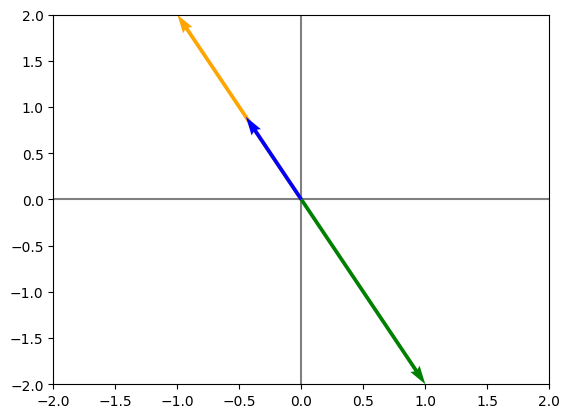

In [37]:
graficarVectores([v.flatten(), Xv.flatten(), v_np.flatten()], cols =["orange", "green", "blue"])
plt.ylim(-2, 2)
plt.xlim(-2, 2)

### Descomposición de matrices
Una matriz $A$ se puede representar como:
$$
A = \begin{pmatrix}
eigvectors
\end{pmatrix}
\cdot 
\begin{pmatrix}
\lambda _{1} & 0 & 0 \\
0 & 0 \lambda _{2} & 0 \\
0 & 0  & \lambda _{3}
\end{pmatrix}
\cdot 
\begin{pmatrix}
eigenvectors
\end{pmatrix} ^{-1}

= V \cdot diag(\lambda) \cdot V^{-1}
$$

In [38]:
A_calc = eigvectors.dot(np.diag(eigvalues)).dot(np.linalg.inv(eigvectors))
A_calc

array([[3., 2.],
       [4., 1.]])

Otra forma de descomposición para matrices reales y simétricas:

In [39]:
B = np.array([[3,2],[2,3]])
B

array([[3, 2],
       [2, 3]])

In [40]:
A == A.T

array([[ True, False],
       [False,  True]])

In [42]:
eigvalues_B, eigvectors_B = np.linalg.eig(B)

Para este caso en el que $A = A^T$ se tiene que la descomposición se puede escribir como:
$$
A = V \cdot diag(\lambda) \cdot V^{T}
$$

La ventaja de esto es que computacionalmente transponer es menos costoso que invertir una matriz.

In [43]:
A = eigvectors_B.dot(np.diag(eigvalues_B)).dot(eigvectors_B.T)

#### Descomposición en valores singulares
Para matrices no cuadradas.

In [ ]:
A = np.array([[1,2,3],[4,5,6]])

In [51]:
U, D, V = np.linalg.svd(A)

In [52]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [53]:
np.diag(D)

array([[5., 0.],
       [0., 1.]])

In [54]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [58]:
U.dot(D).dot(V)

array([5., 1.])

In [59]:
def graficarMatrix(matriz, vectorCol=["red", "blue"]):
    #circulo unitario
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    #circulo unitario transformado
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y

    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y

    #vectores
    u1 = [matriz[0,0], matriz[1,0]]
    v1 = [matriz[0,1], matriz[1,1]]

    graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
    plt.plot(x1, y1, "green", alpha = 0.7)
    plt.plot(x1_neg, y1_neg, "green", alpha=0.7)

In [60]:
A = np.array([[3,7],[5,2]])

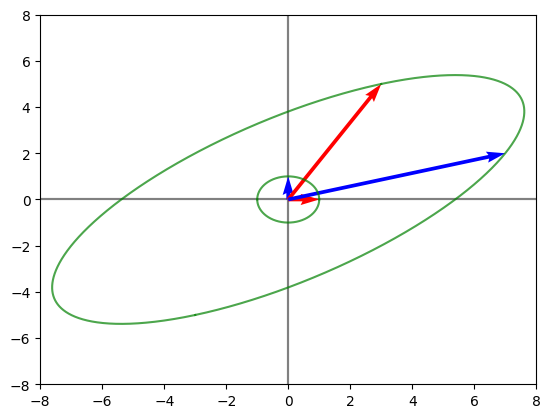

In [64]:
graficarMatrix(np.array([[1,0],[0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

graficarMatrix(A)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [69]:
U, D, V = np.linalg.svd(A)

In [70]:
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [71]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

In [72]:
D

array([8.71337969, 3.32821489])

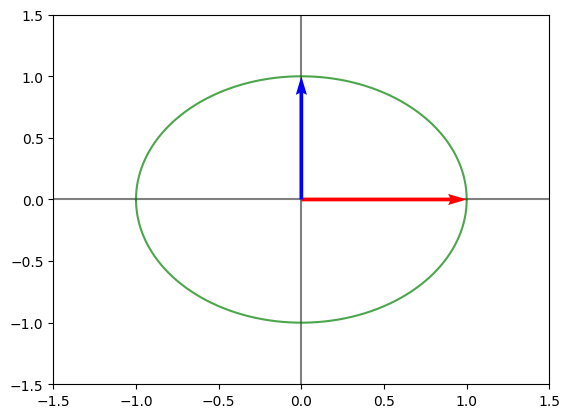

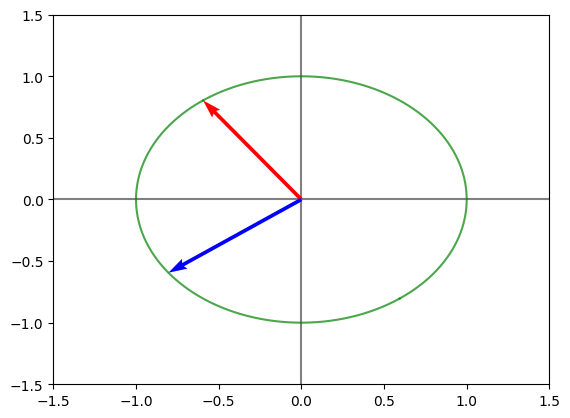

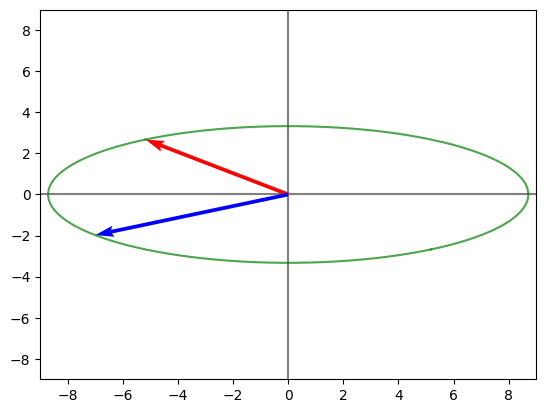

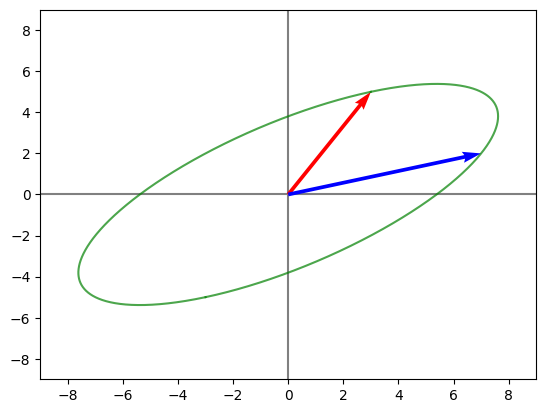

In [77]:
graficarMatrix(np.array([[1,0],[0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()
graficarMatrix(V)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()
graficarMatrix(np.diag(D).dot(V))

plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()
graficarMatrix(U.dot(np.diag(D).dot(V)))

plt.xlim(-9, 9)
plt.ylim(-9, 9)

plt.show()

## Aplicación de SVD a imagenes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

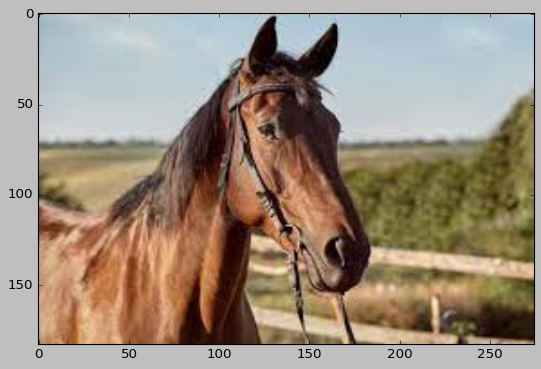

In [5]:
plt.style.use("classic")
imagen = Image.open("img/hourse.jpg")
plt.imshow(imagen)

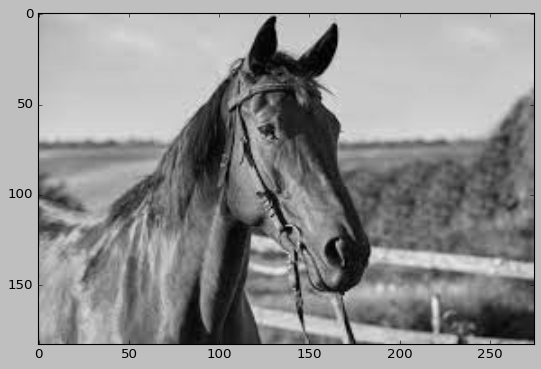

In [8]:
imagen_gr = imagen.convert("LA")
plt.imshow(imagen_gr)

In [11]:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)

In [12]:
imagen_mat

array([180., 180., 181., ..., 151., 151., 151.])

In [13]:
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
imagen_mat

array([[180., 180., 181., ..., 201., 201., 201.],
       [179., 180., 181., ..., 200., 200., 200.],
       [178., 179., 180., ..., 199., 199., 199.],
       ...,
       [144., 154., 162., ...,  25.,  25.,  25.],
       [138., 149., 158., ...,  93.,  93.,  93.],
       [134., 145., 155., ..., 151., 151., 151.]])

In [15]:
imagen_mat.shape

(183, 275)

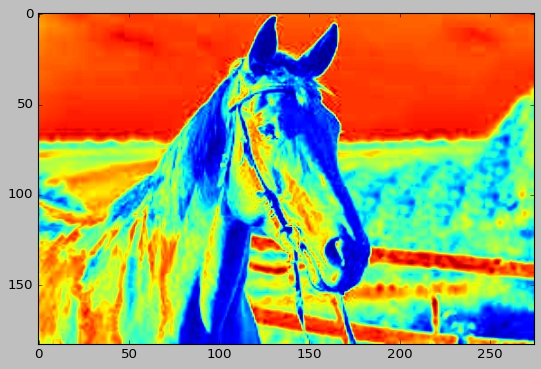

In [24]:
plt.imshow(imagen_mat)
plt.show()

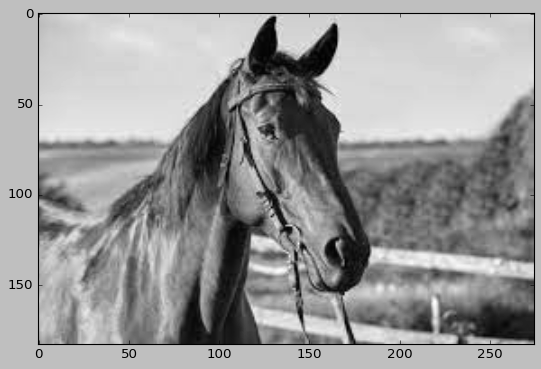

In [18]:
plt.imshow(imagen_mat, cmap="gray")
plt.show()

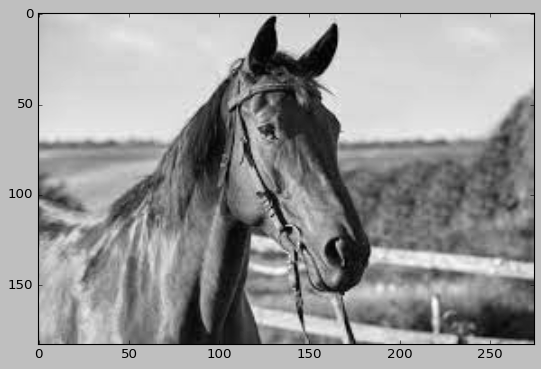

In [81]:
imagen_mat_2 = imagen_mat/255
plt.imshow(imagen_mat_2, cmap="gray")
plt.show()

In [43]:
imagen_mat_2.shape

(183, 275)

In [44]:
U, D, V = np.linalg.svd(imagen_mat)

In [46]:
print(U.shape)
print(D.shape)
print(V.shape)

(183, 183)
(183,)
(275, 275)


In [47]:
imagen_recons = np.matrix(U[:, :1])*np.diag(D[:1])*np.matrix(V[:1,:])

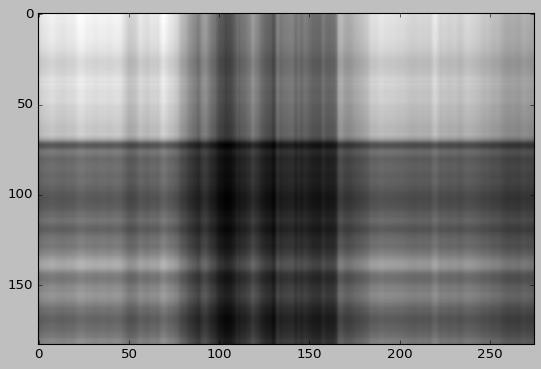

In [49]:
plt.imshow(imagen_recons, cmap="gray")
plt.show()

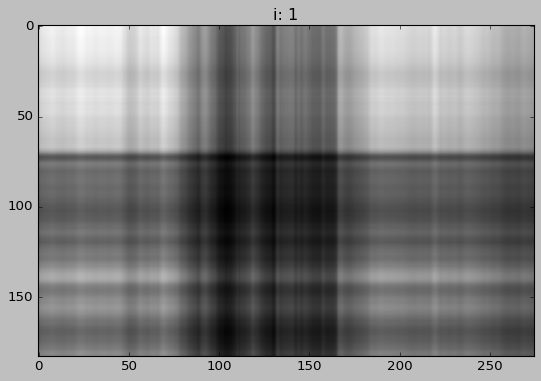

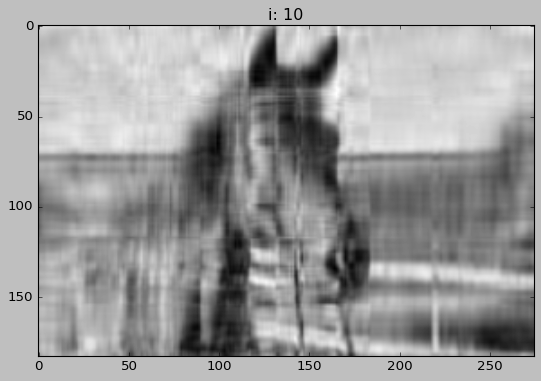

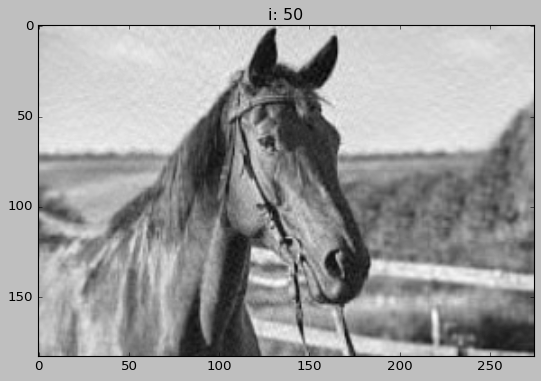

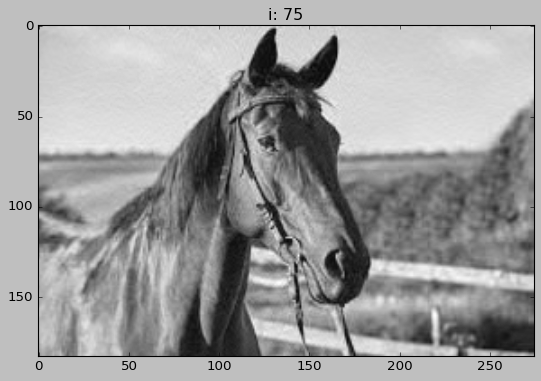

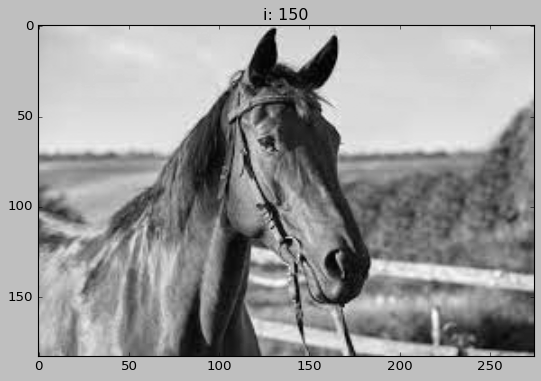

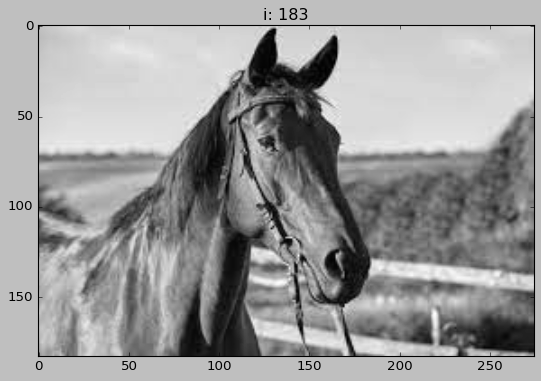

In [72]:
for i in [1, 10, 50, 75,150, 183]:
    imagen_recons = np.matrix(U[:, :i])*np.diag(D[:i])*np.matrix(V[:i,:])
    plt.imshow(imagen_recons, cmap="gray") 
    plt.title("i: "+ str(i))
    plt.show()

In [73]:
np.set_printoptions(suppress=True)

In [74]:
A = np.array([[2,3], [5,7], [11,13]])
A

array([[ 2,  3],
       [ 5,  7],
       [11, 13]])

In [83]:
U, D, V = np.linalg.svd(A)
print(U)
print(D)
print(V)

[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]
[19.40321383  0.71783924]
[[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]


In [84]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
D_pse

array([[0., 0., 0.],
       [0., 0., 0.]])

In [87]:
D_pse[:D.shape[0], :D.shape[0]]

array([[0., 0.],
       [0., 0.]])

In [88]:
np.linalg.inv(np.diag(D))

array([[0.05153785, 0.        ],
       [0.        , 1.39306957]])

In [89]:
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))

In [90]:
D_pse[:D.shape[0], :D.shape[0]]

array([[0.05153785, 0.        ],
       [0.        , 1.39306957]])

In [91]:
A_pse = V.T.dot(D_pse).dot(U.T)
A_pse_calc = np.linalg.pinv(A)

In [92]:
A_pse.dot(A)

array([[ 1., -0.],
       [ 0.,  1.]])

In [93]:
np.set_printoptions(suppress=False)
A_pse.dot(A)

array([[ 1.00000000e+00, -1.77635684e-15],
       [ 4.44089210e-16,  1.00000000e+00]])

In [94]:
A.dot(A_pse)

array([[ 0.25773196,  0.43298969, -0.06185567],
       [ 0.43298969,  0.74742268,  0.03608247],
       [-0.06185567,  0.03608247,  0.99484536]])

In [97]:
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)

In [98]:
A_pse_2

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])